### Reconhecimento Facial com Machine Learning Usando SVM e PCA

O objetivo é mostrar uma aplicação de Machine Learning com o algoritmo SVM e PCA para reconhecimento facial

### Definição do Problema

Vamos criar um modelo para reconhecimento facial, usando SVM e PCA.

Essa abordagem trata o reconhecimento de face como um problema de reconhecimento bidimensional, aproveitando o fato de que as faces normalmente estão na posição vertical e, portanto, podem ser descritas por um pequeno conjunto de características 2D. As imagens de rosto são projetadas em um espaço de recurso ('espaço de rosto') que melhor codifica a variação entre imagens de rosto conhecidas. 

O PCA é aplicado para reduzir a dimensionalidade dos dados e então treinar o modelo SVM para uma tarefa de classificação.

Leia atentamente cada comentário que incluímos nas células, explicando todo o processo passo a passo.

#### Carregando Pacotes

In [1]:
# Importando os pacotes
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset de imagens
from sklearn import datasets


In [2]:
# Carregando o dataset, farei um dowload de 80 imagens por pessoa com fator de redimensionamento de 0.4
dataset_faces = datasets.fetch_lfw_people(min_faces_per_person=80, resize = 0.4)

In [3]:
# Conferindo o shape do dataset
dataset_faces.data.shape

(1140, 1850)

In [4]:
# extraindo os detalhes do shape
num_amostras, altura, largura = dataset_faces.images.shape

In [5]:
# Este é o número de imagens no dataset
num_amostras

1140

In [6]:
# Esta é a altura de cada imagem (número de pixels)
altura

50

In [7]:
# Esta é a largura de cada imagem (número de pixels)
largura

37

In [8]:
# Aqui vou colocar data em X ára variáveis de entrada e target em y
X = dataset_faces.data

In [10]:
# Número de atributos do x
num_atributos = X.shape[1]
num_atributos

1850

In [12]:
# Target em y
y = dataset_faces.target

In [13]:
# Vamos extrair os nomes das classes
target_names = dataset_faces.target_names

In [15]:
# Quantas classe eu tenho
num_classes = target_names.shape[0]
num_classes

5

In [17]:
# Vamos imprimir um resumo dos dados
print("\nTamanho Total do Dataset:\n")
print("Número de Amostras: %d" % num_amostras)
print("Número de Atributos: %d" % num_atributos)
print("Número de Classes: %d" % num_classes)


Tamanho Total do Dataset:

Número de Amostras: 1140
Número de Atributos: 1850
Número de Classes: 5


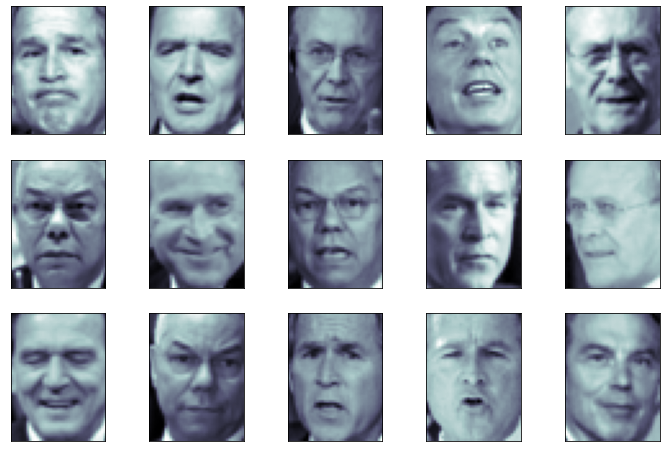

In [21]:
# Plot de imagens

fig = plt.figure(figsize = (12, 8))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks = [], yticks = [])
    
    ax.imshow(dataset_faces.images[i], cmap = plt.cm.bone)

In [ ]:
vamos